#**Thông tin sinh viên:**
* MSSV: 19521388
* Họ và tên: Hoàng Tiến Dũng
* Lớp môn học: CS331.M11
* Bài tập: Trực quan hóa feature map.

#**Bài làm:**

##**1. Khai báo và cài đặt hàm cần thiết**

In [174]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import os
import matplotlib.pyplot as plt 
import cv2 as cv
from google.colab.patches import cv2_imshow

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

In [5]:
os.chdir("/content/drive/MyDrive/Private_ThiGiacMayTinhNangCao")

In [175]:
# Gọi pretrained model trên imagenet VGG19
base_model = VGG19(include_top=False, weights="imagenet")
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [188]:
path_img1 = "./img1.jpg"
path_img2 = "./img2.jpg"

In [177]:
# Tiền xử lý ảnh 
def preprocess_for_vgg19(path_img):
    img = image.load_img(path_img, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    return img_data

In [182]:
# Tạo model lấy các layer: block1_conv1, block1_conv2, block1_pool, block5_pool
layer_names = ["block1_conv1", "block1_conv2", "block1_pool", "block5_pool"]
outputs = [base_model.get_layer(layer_name).output for layer_name in layer_names]
model = Model([base_model.input], outputs)

In [186]:
# Hàm chuẩn hóa ảnh feature map về 0 - 255
def normalize_fm(fm):
    pmax = np.max(fm)
    if pmax == 0:
        return fm
    return fm * (255 / pmax)

# Hàm trực quan và lưu feature map
def visualize_feature_map(feature_map, save_img = False, path_img = "fm_img.png"):
    w, h, num_fm = feature_map.shape
    n = int(np.sqrt(num_fm))
    if n * n != num_fm:
        n = n + 1
    
    fig = plt.figure(figsize=(10, 10))
    
    for i in range(0, n * n):
        if i >= num_fm:
            normalized_fm = np.ones((w, h)) * 255
        else:
            normalized_fm = normalize_fm(feature_map[:, :, i])
        fig.add_subplot(n, n, i+1)
        plt.axis('off')
        plt.imshow(normalized_fm, cmap='gray', vmin=0, vmax=255)
    plt.show()

    # Lưu ảnh trực quan feature map
    if save_img == True:
        fig.savefig(path_img)

##**2. Ảnh người**

In [190]:
# Thực hiện visualize trên ảnh 1
img_data = preprocess_for_vgg19(path_img1)
img_data.shape

(1, 224, 224, 3)

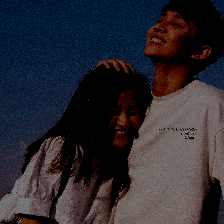

In [191]:
cv2_imshow(img_data[0])

In [192]:
# Dùng pretrained dự đoán các layers
outs = model.predict(img_data)

In [193]:
for i in range(len(outs)):
    print(outs[i].shape)

(1, 224, 224, 64)
(1, 224, 224, 64)
(1, 112, 112, 64)
(1, 7, 7, 512)


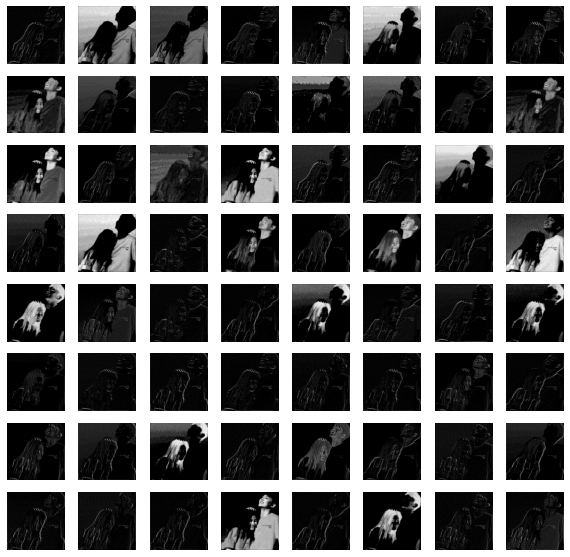

In [195]:
# Visualize layer block1_conv1
visualize_feature_map(outs[0][0], save_img=True, path_img="fm_layer1_1.png")

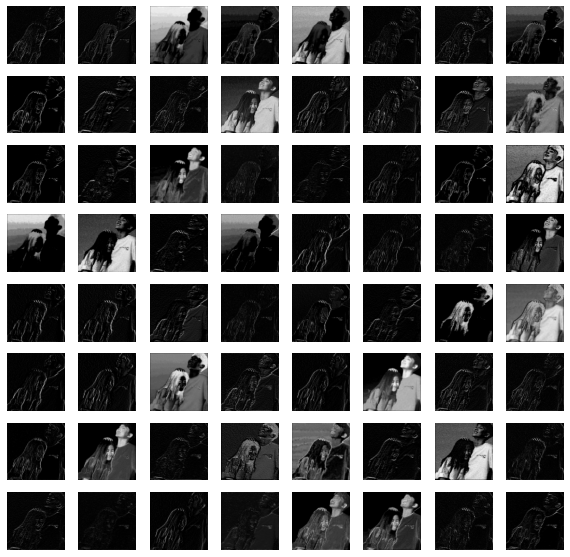

In [196]:
# Visualize layer block1_conv2
visualize_feature_map(outs[1][0], save_img=True, path_img="fm_layer2_1.png")

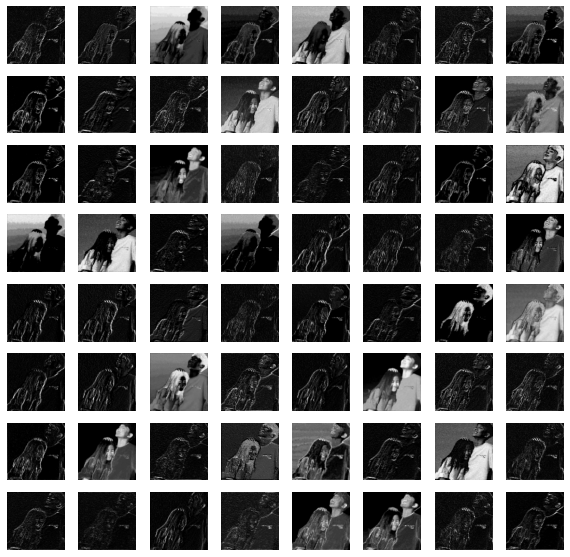

In [197]:
# Visualize layer block1_pool
visualize_feature_map(outs[2][0], save_img=True, path_img="fm_layer3_1.png")

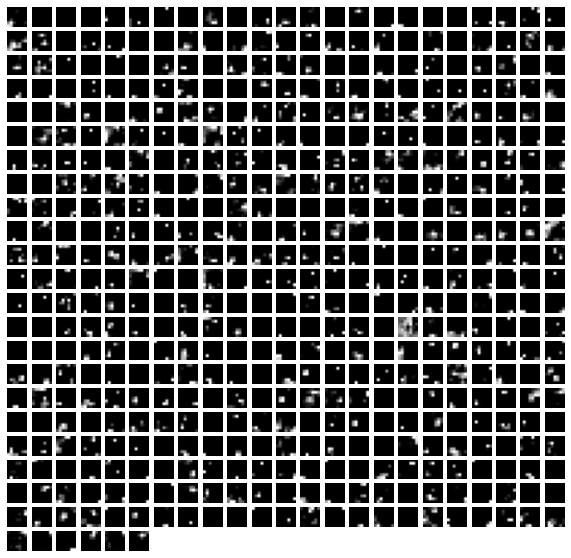

In [198]:
# Visualize layer block5_pool
visualize_feature_map(outs[3][0], save_img=True, path_img="fm_layer4_1.png")

##**3. Ảnh sách**

In [199]:
# Thực hiện visualize trên ảnh 2
img_data = preprocess_for_vgg19(path_img2)
img_data.shape

(1, 224, 224, 3)

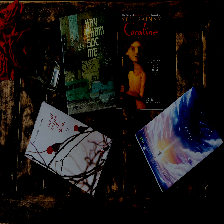

In [200]:
cv2_imshow(img_data[0])

In [201]:
# Dùng pretrained dự đoán các layers
outs = model.predict(img_data)

In [202]:
for i in range(len(outs)):
    print(outs[i].shape)

(1, 224, 224, 64)
(1, 224, 224, 64)
(1, 112, 112, 64)
(1, 7, 7, 512)


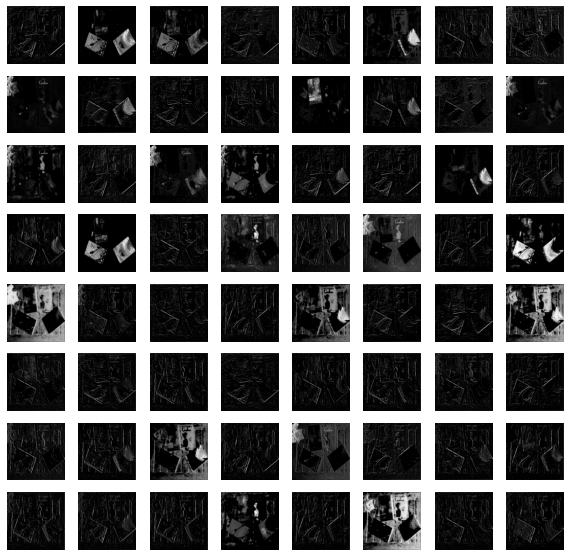

In [203]:
# Visualize layer block1_conv1
visualize_feature_map(outs[0][0], save_img=True, path_img="fm_layer1_2.png")

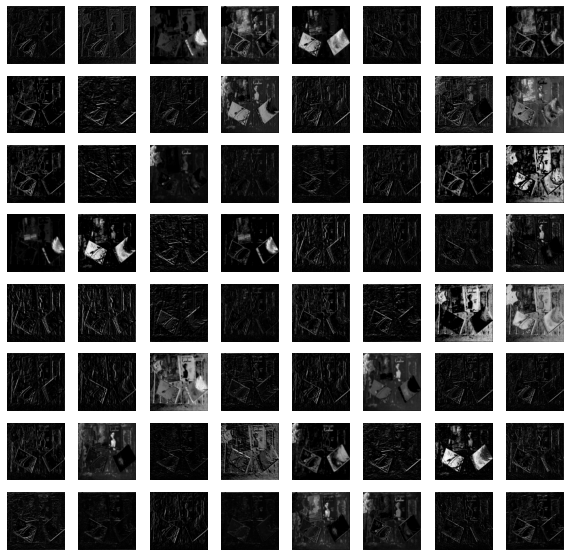

In [204]:
# Visualize layer block1_conv2
visualize_feature_map(outs[1][0], save_img=True, path_img="fm_layer2_2.png")

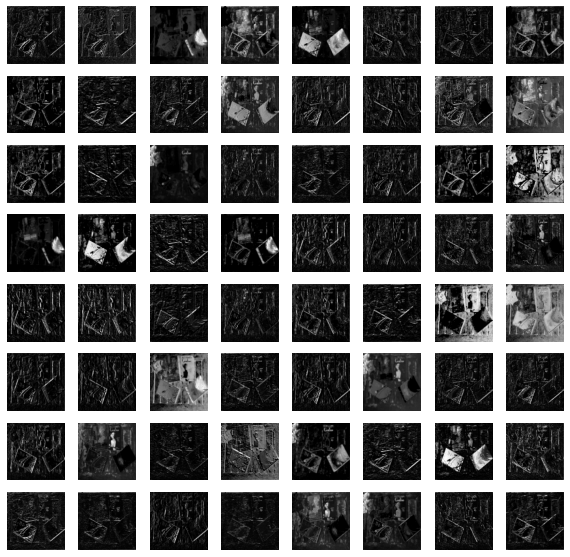

In [205]:
# Visualize layer block1_pool
visualize_feature_map(outs[2][0], save_img=True, path_img="fm_layer3_2.png")

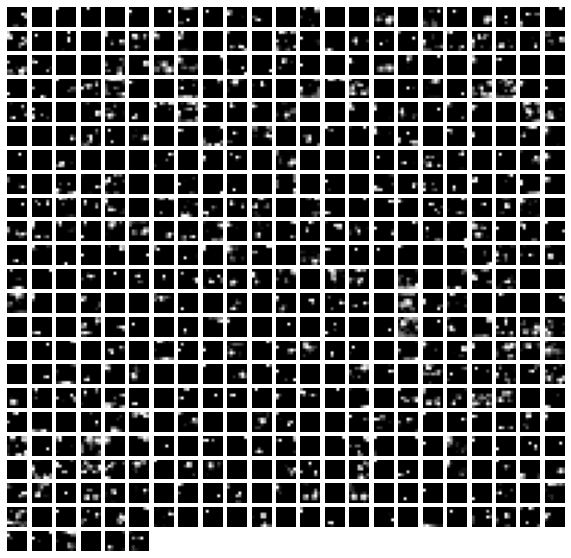

In [206]:
# Visualize layer block5_pool
visualize_feature_map(outs[3][0], save_img=True, path_img="fm_layer4_2.png")